In [1]:
library(ggplot2)

In [2]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv", row.names=1)
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,⋯,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label,new_label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,⋯,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,⋯,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11,FPP_D11


In [3]:
leads$feature_id = as.character(leads$feature_id)
leads$snp_id = as.character(leads$snp_id)

In [4]:
celltype = "Sert"
celltypes = unique(leads$new_label[grep(celltype, leads$new_label)])
all_leads = leads

In [5]:
leads = all_leads[all_leads$global_corr_p_value < 0.05,]
res1 = leads[leads$new_label == celltypes[1],]
res2 = leads[leads$new_label == celltypes[2],]
res3 = leads[leads$new_label == celltypes[3],]

In [6]:
selected_genes = c()
for (i in 1:length(unique(res1$feature_id))){
    gene = res1$feature_id[i]
    snp1 = res1[res1$feature_id == gene,"snp_id"][1]
    snp2 = res2[res2$feature_id == gene,"snp_id"][1]
    snp3 = res3[res3$feature_id == gene,"snp_id"][1]
    if (length(unique(c(snp1,snp2,snp3)))>1){ selected_genes = c(selected_genes,gene) }
}
length(unique(res1$feature_id))
length(unique(selected_genes))

[1] 545

[1] 481

In [7]:
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
head(annos)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
ENSG00000000003_TSPAN6,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419_DPM1,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419
ENSG00000000457_SCYL3,1,169818772,169863408,SCYL3,ENSG00000000457_SCYL3,ENSG00000000457
ENSG00000000460_C1orf112,1,169631245,169823221,C1orf112,ENSG00000000460_C1orf112,ENSG00000000460
ENSG00000001036_FUCA2,6,143815948,143832827,FUCA2,ENSG00000001036_FUCA2,ENSG00000001036
ENSG00000001084_GCLC,6,53362139,53481768,GCLC,ENSG00000001084_GCLC,ENSG00000001084


In [36]:
selected_genes1 = c()

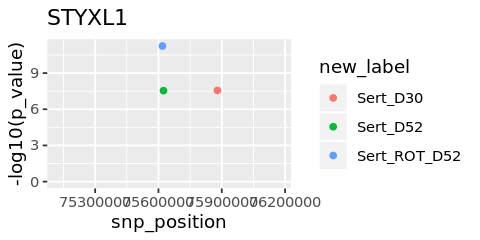

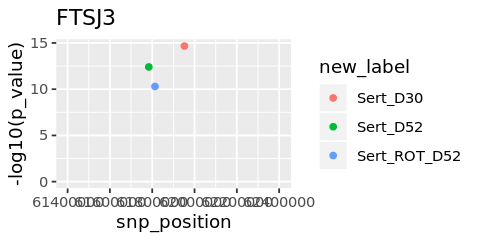

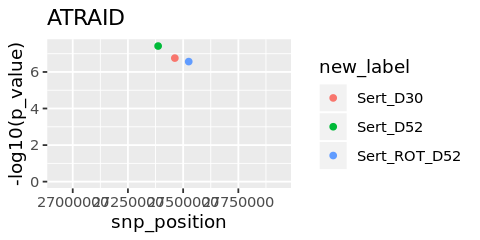

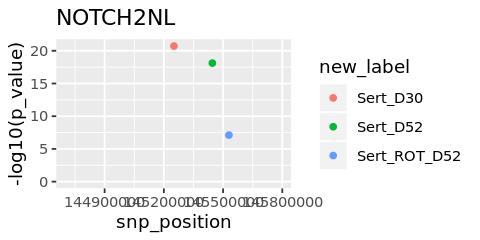

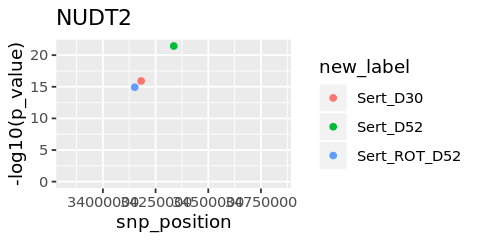

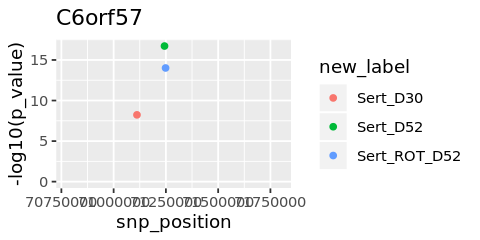

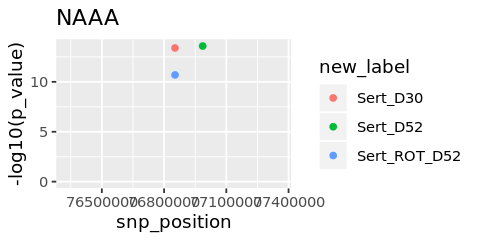

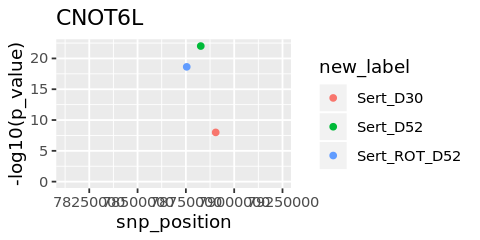

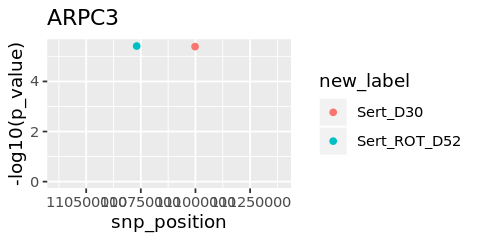

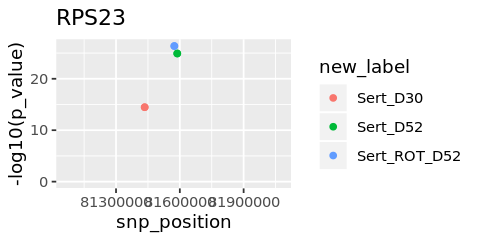

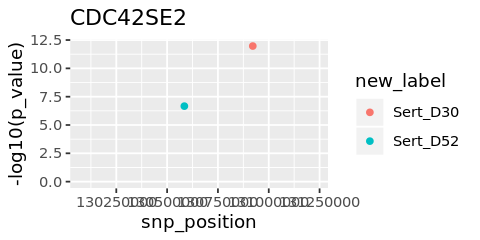

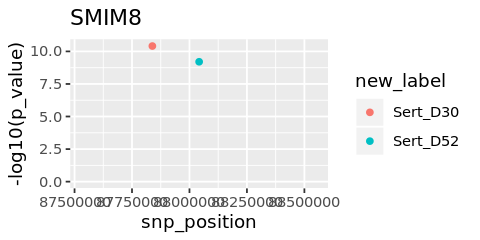

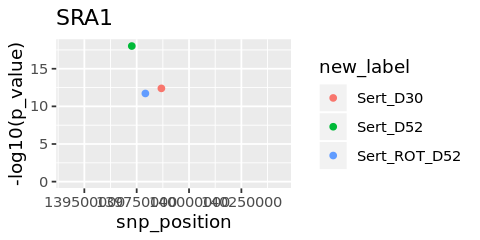

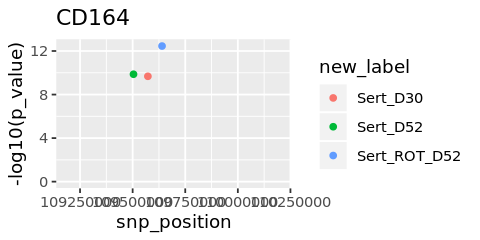

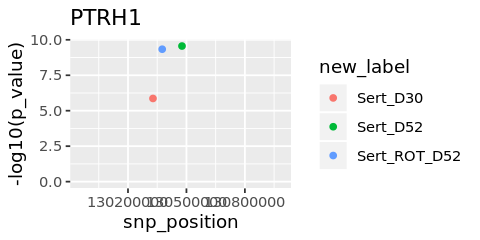

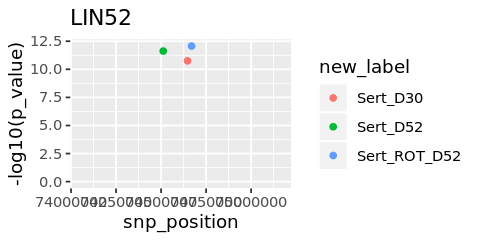

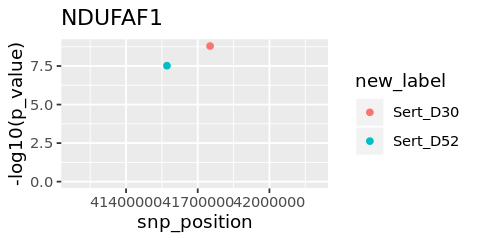

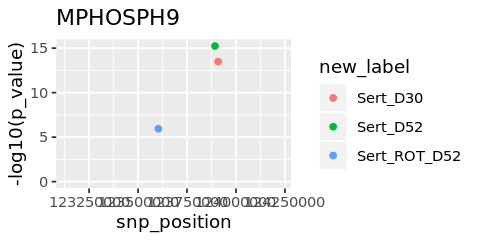

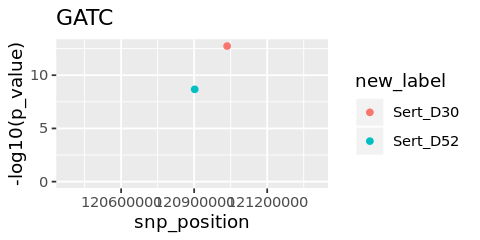

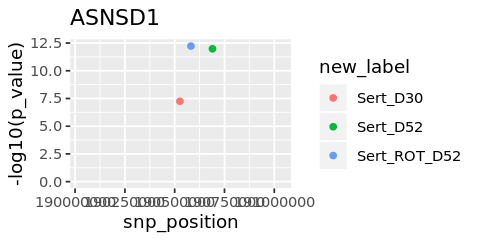

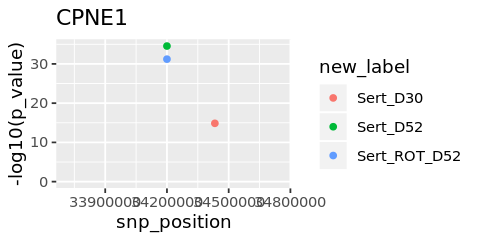

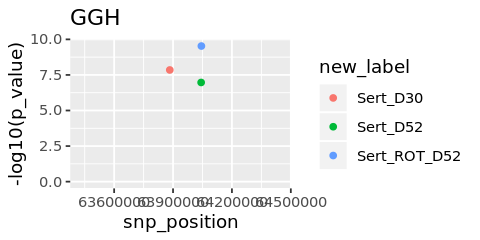

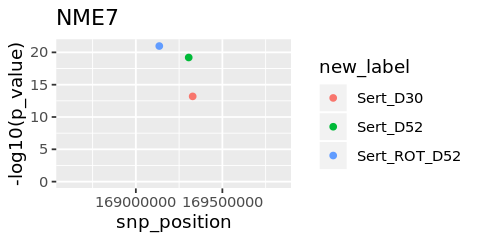

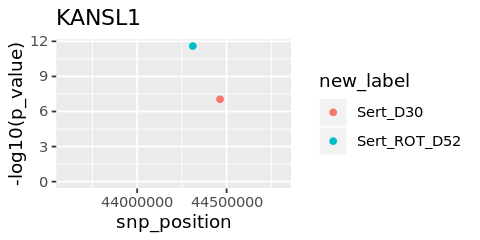

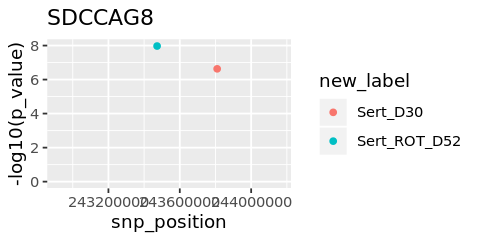

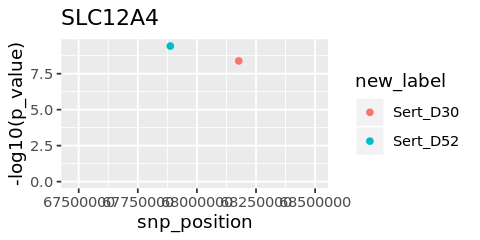

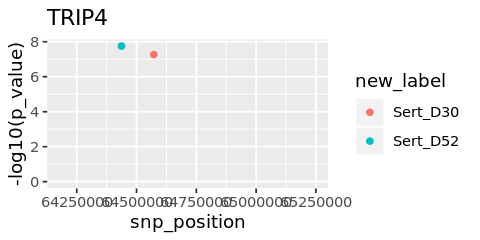

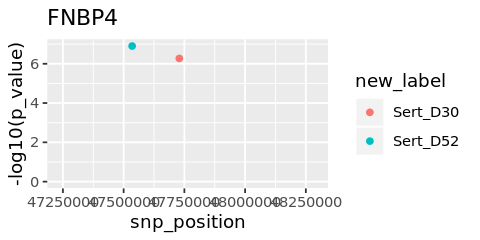

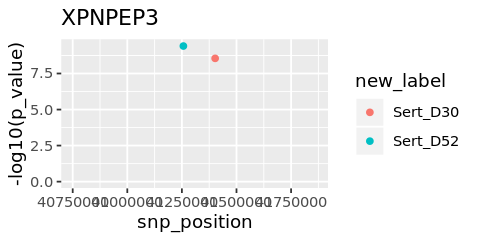

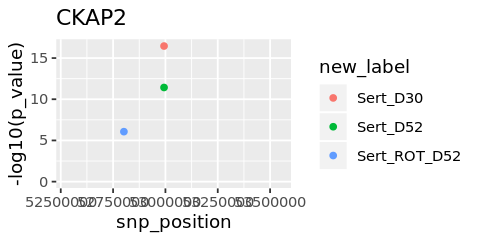

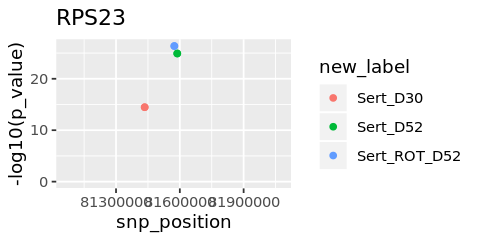

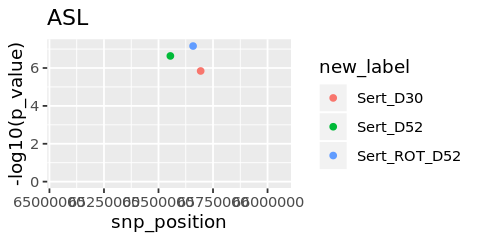

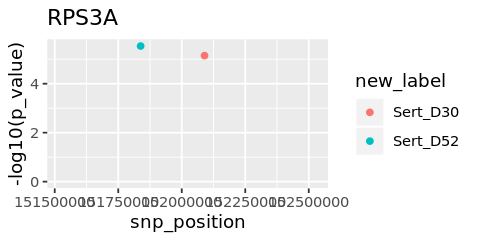

In [37]:
options(repr.plot.width = 4, repr.plot.height = 2)
for (gene in selected_genes){
    gene_name = as.character(annos[annos$ensembl_gene_id == gene,"hgnc_symbol"])
    r1 = res1[res1$feature_id == gene,]
    r2 = res2[res2$feature_id == gene,]
    r3 = res3[res3$feature_id == gene,]
    df = rbind(r1,r2,r3)
    w0 = df$feature_start[1]-500000
    w1 = df$feature_end[1]+500000
#     print(abs(max(df$snp_position)-min(df$snp_position)))
#     print((w1-w0)/10)
    if (abs(max(df$snp_position)-min(df$snp_position))>((w1-w0)/8)){
        selected_genes1 = c(selected_genes1,gene)
        p = ggplot(df, aes(x = snp_position, y = -log10(p_value), colour = new_label))+geom_point()
        p = p + ggtitle(gene_name) + xlim(c(w0,w1)) + ylim(c(0,-log10(min(df$p_value))))
        print(p)
    }  
}

In [38]:
length(selected_genes1)
selected_genes1

[1] 33

[1] "ENSG00000127952" "ENSG00000108592" "ENSG00000138085" "ENSG00000213240"
 [5] "ENSG00000164978" "ENSG00000154079" "ENSG00000138744" "ENSG00000138767"
 [9] "ENSG00000111229" "ENSG00000186468" "ENSG00000158985" "ENSG00000111850"
[13] "ENSG00000213523" "ENSG00000135535" "ENSG00000187024" "ENSG00000205659"
[17] "ENSG00000137806" "ENSG00000051825" "ENSG00000257218" "ENSG00000138381"
[21] "ENSG00000214078" "ENSG00000137563" "ENSG00000143156" "ENSG00000120071"
[25] "ENSG00000054282" "ENSG00000124067" "ENSG00000103671" "ENSG00000109920"
[29] "ENSG00000196236" "ENSG00000136108" "ENSG00000186468" "ENSG00000126522"
[33] "ENSG00000145425"

In [39]:
Sert.D30.dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/"
myfiles = paste0(Sert.D30.dir,list.files(Sert.D30.dir))
myfiles

[1] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_ARPC3_D30.txt"   
 [2] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_CDC42SE2_D30.txt"
 [3] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_CPNE1_D30.txt"   
 [4] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_MPHOSPH9_D30.txt"
 [5] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_NOTCH2NL_D30.txt"
 [6] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_NUDT2_D30.txt"   
 [7] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_RPS3A_D30.txt"   
 [8] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_SDCCAG8_D30.txt" 
 [9] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_SLC12A4_D30.txt" 
[10] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/Sert/manhattan_example_STYXL1_D30.txt"

In [40]:
res.Sert.D30 <- do.call(`rbind`,lapply(myfiles, read.csv, sep="\t", header = F))

In [41]:
# mydir.D52 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/summary_stats/for_coloc/"
# res.Sert.D52 = read.csv(paste0(mydir.D52,"qtl_results_NONE_Sert_all.txt"),sep="\t")
# res.Sert.D52ROT = read.csv(paste0(mydir.D52,"qtl_results_ROT_Sert_all.txt"),sep="\t")

In [42]:
colnames(res.Sert.D30) = colnames(res.Sert.D52ROT)

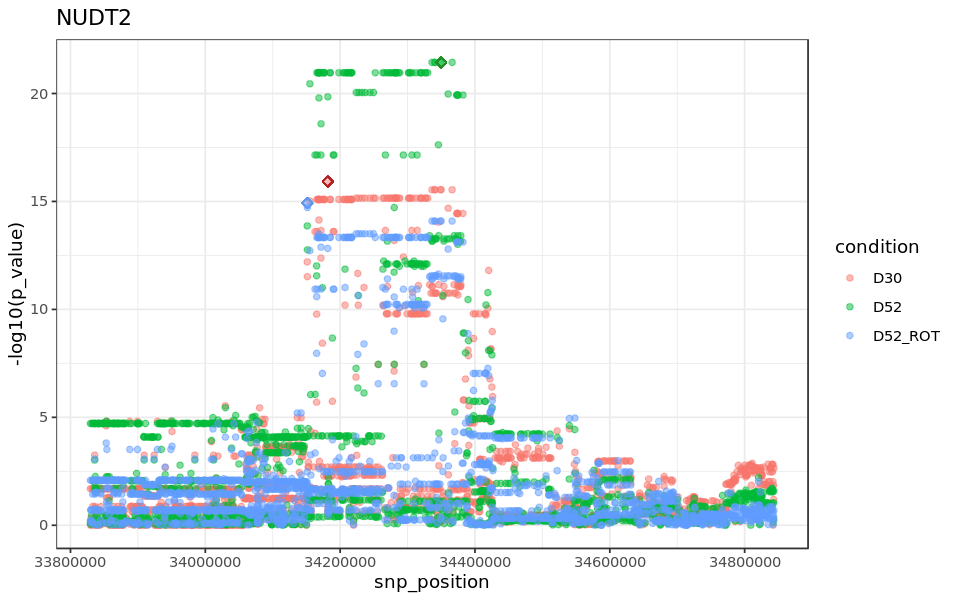

In [43]:
options(repr.plot.width = 8, repr.plot.height = 5)
for (gene in selected_genes1[5]){
    gene_name = as.character(annos[annos$ensembl_gene_id == gene,"hgnc_symbol"])
    r1 = res.Sert.D30[res.Sert.D30$feature_id == gene,]
    r2 = res.Sert.D52[res.Sert.D52$feature_id == gene,]
    r3 = res.Sert.D52ROT[res.Sert.D52ROT$feature_id == gene,]
#     print(head(r1))
    r1$condition = "D30"
    r2$condition = "D52"
    r3$condition = "D52_ROT"
    df = rbind(r1,r2,r3)
    m1 = min(df[df$condition == "D30","p_value"])
    pos1 = df[df$condition == "D30" & df$p_value == m1,"snp_position"][1]
    m2 = min(df[df$condition == "D52","p_value"])
    pos2 = df[df$condition == "D52" & df$p_value == m2,"snp_position"][1]
    m3 = min(df[df$condition == "D52_ROT","p_value"])
    pos3 = df[df$condition == "D52_ROT" & df$p_value == m3,"snp_position"][1]
    p = ggplot(df, aes(x = snp_position, y = -log10(p_value), colour = condition))+geom_point(alpha = 0.5)
    p = p + geom_point(aes(x=pos1, y = -log10(m1)),col="firebrick", size = 2, shape = 23, alpha = 1)
    p = p + geom_point(aes(x=pos2, y = -log10(m2)),col="forestgreen", size = 2, shape = 23, alpha = 1)
    p = p + geom_point(aes(x=pos3, y = -log10(m3)),col="cornflowerblue", size = 2, shape = 23, alpha = 1)
    p = p + ggtitle(gene_name) #+ xlim(c(w0,w1)) 
    p = p + ylim(c(0,-log10(min(df$p_value)))) + theme_bw()
    print(p)  
}

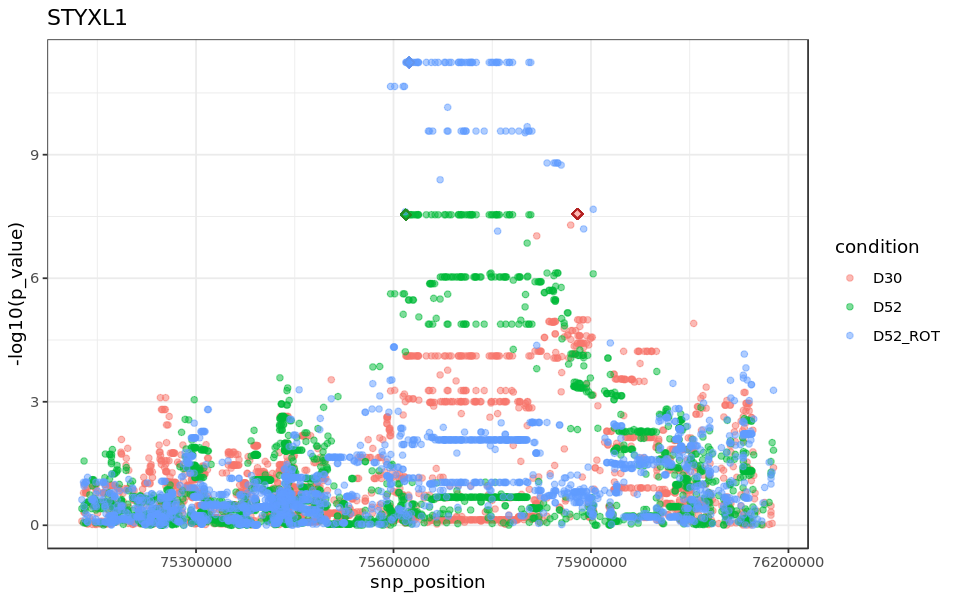

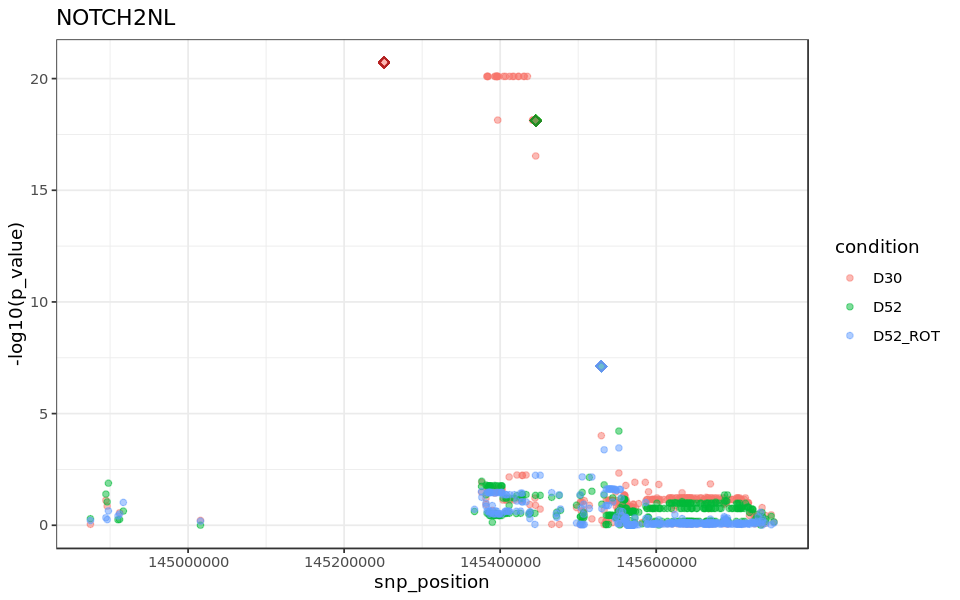

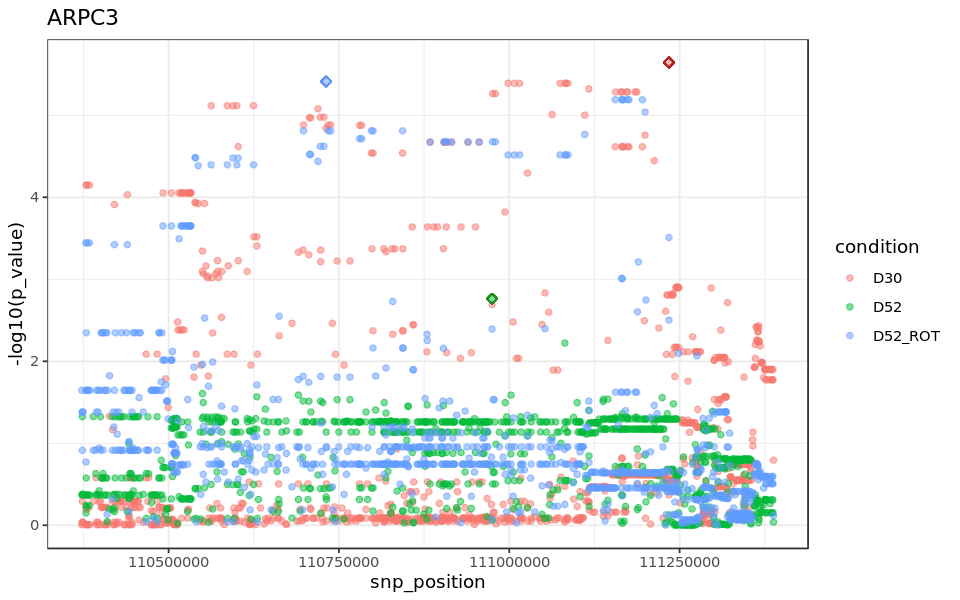

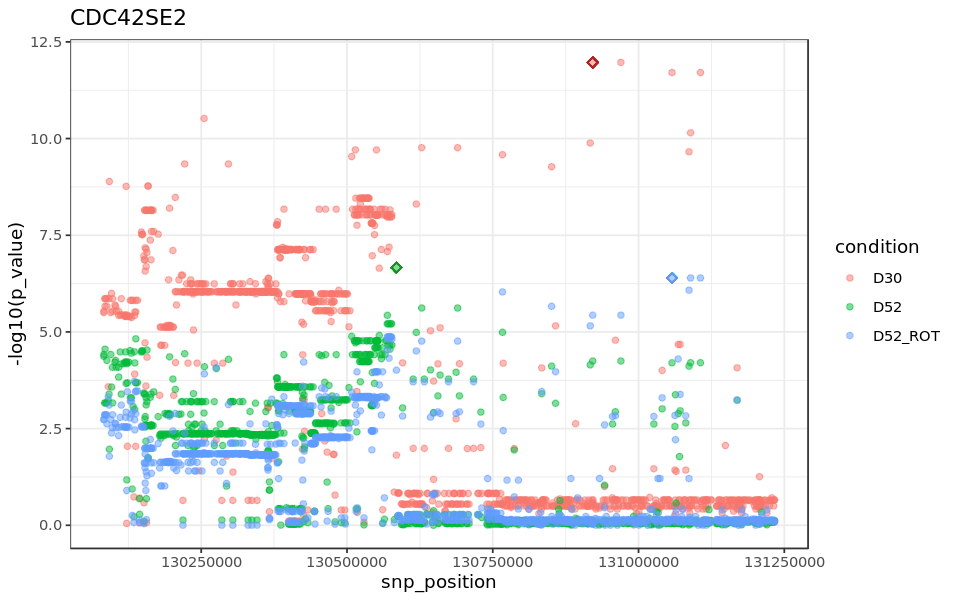

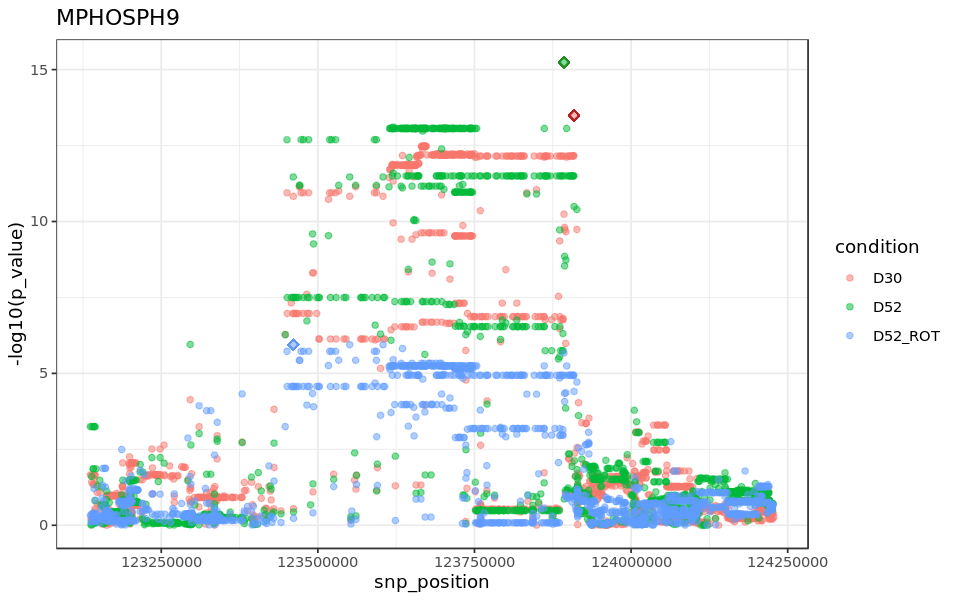

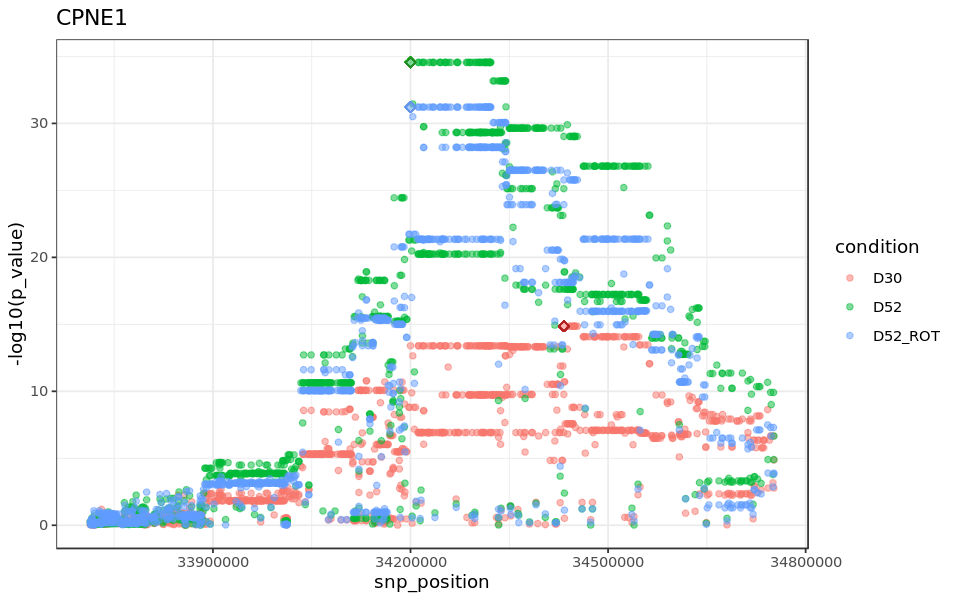

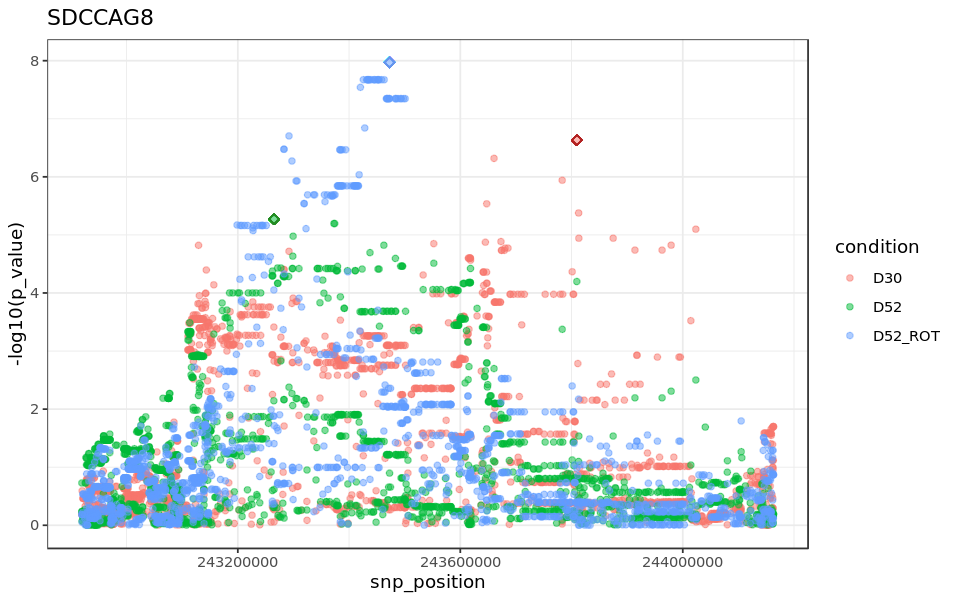

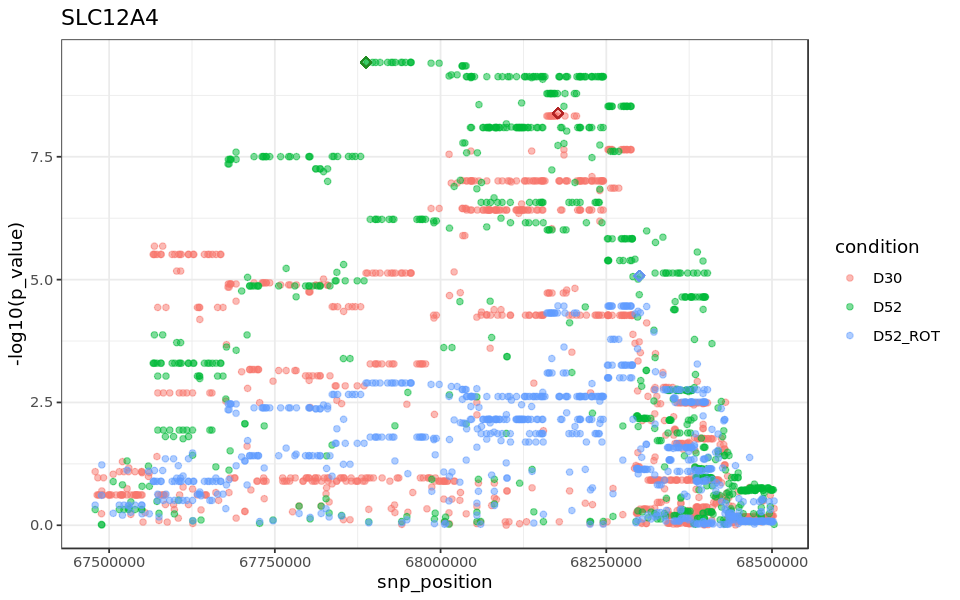

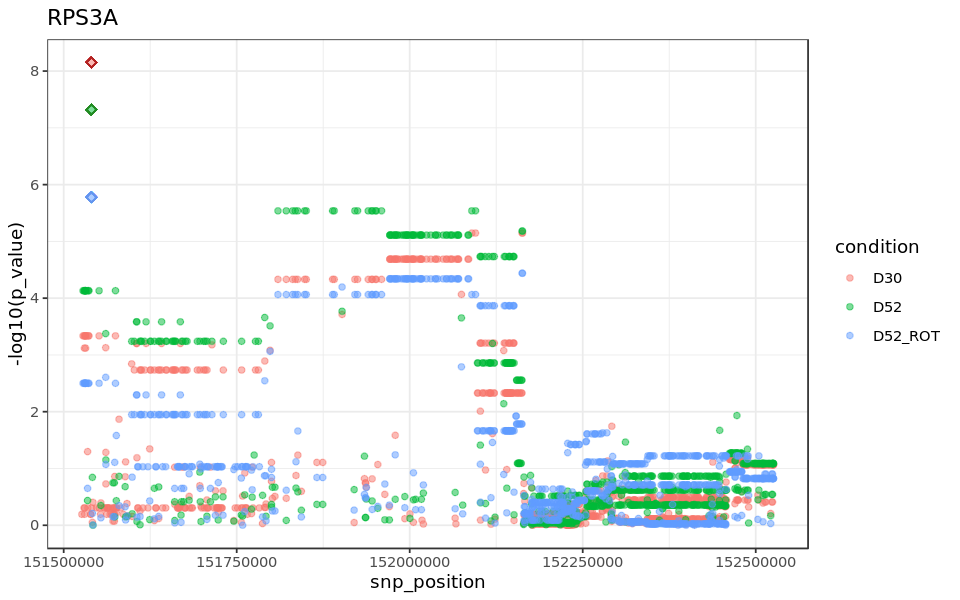

In [22]:
options(repr.plot.width = 8, repr.plot.height = 5)
for (gene in selected_genes1){
    gene_name = as.character(annos[annos$ensembl_gene_id == gene,"hgnc_symbol"])
    r1 = res.Sert.D30[res.Sert.D30$feature_id == gene,]
    r2 = res.Sert.D52[res.Sert.D52$feature_id == gene,]
    r3 = res.Sert.D52ROT[res.Sert.D52ROT$feature_id == gene,]
#     print(head(r1))
    r1$condition = "D30"
    r2$condition = "D52"
    r3$condition = "D52_ROT"
    df = rbind(r1,r2,r3)
    m1 = min(df[df$condition == "D30","p_value"])
    pos1 = df[df$condition == "D30" & df$p_value == m1,"snp_position"][1]
    m2 = min(df[df$condition == "D52","p_value"])
    pos2 = df[df$condition == "D52" & df$p_value == m2,"snp_position"][1]
    m3 = min(df[df$condition == "D52_ROT","p_value"])
    pos3 = df[df$condition == "D52_ROT" & df$p_value == m3,"snp_position"][1]
    p = ggplot(df, aes(x = snp_position, y = -log10(p_value), colour = condition))+geom_point(alpha = 0.5)
    p = p + geom_point(aes(x=pos1, y = -log10(m1)),col="firebrick", size = 2, shape = 23, alpha = 1)
    p = p + geom_point(aes(x=pos2, y = -log10(m2)),col="forestgreen", size = 2, shape = 23, alpha = 1)
    p = p + geom_point(aes(x=pos3, y = -log10(m3)),col="cornflowerblue", size = 2, shape = 23, alpha = 1)
    p = p + ggtitle(gene_name) #+ xlim(c(w0,w1)) 
    p = p + ylim(c(0,-log10(min(df$p_value)))) + theme_bw()
    print(p)  
}